In [1]:
def show(img):
    cv2.imshow("Input",img)
    cv2.waitKey(0); 
    cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2
from copy import deepcopy
import matplotlib.pyplot as plt
from PIL import Image
#import pytesseract as tess


In [3]:

image=cv2.imread('b5.png')
show(image)
img=image


In [4]:


#img=cv2.imread('scaled_down.jpg')
#show(img)

#for color IMAGE
#img = cv2.detailEnhance(img, 9, 10, 0.2)

#blurring to remove high frequency component
imgBlurred = cv2.GaussianBlur(img, (5,5), 0)
show(imgBlurred)

#imgBlurred = cv2.bilateralFilter(img,9,35,35)
#show(imgBlurred)

#color to greyscale image
gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)
show(gray)


rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)


#sobel edge detection 
#sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=3)
#show(sobelx)


#otsu thresolding
ret2,threshold_img = cv2.threshold(blackhat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(threshold_img)



In [5]:
morph_img_threshold = threshold_img.copy()


# rectangular kernel for morphological operation
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(20, 1))  #(20,10)

#morphological operation(dilation)
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)

show(morph_img_threshold)


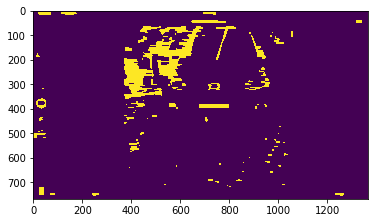

In [6]:
#added new 
thresh = cv2.erode(morph_img_threshold, None, iterations=2)
show(thresh)
thresh = cv2.dilate(thresh, None, iterations=2)
show(thresh)
plt.imshow(thresh)


In [7]:
#finding contours is like finding white object from black background.
#contours => (x,y) corrdinates of object

#Contour Approximation Method 
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html
# cv2.CHAIN_APPROX_NONE -all the boundary points are stored
#cv2.CHAIN_APPROX_SIMPLE -just two end points of that line , saving the memory

contours, hierarchy= cv2.findContours(thresh,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
#contours2, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.cv2.CHAIN_APPROX_SIMPLE)



In [8]:
def Validation_And_RatioTest(objectArea):
    (x,y),(width,height),angle=objectArea
    
    aspectRatio=0
    if width>height:
            aspectRatio=width/height
    else:
        aspectRatio=height/width
        
    #print(aspectRatio)
    #return True

    print(aspectRatio , width,height)

    if aspectRatio<3 or aspectRatio>8:
        return False
    

    return True

In [9]:
def width_greater_(contour):
    
    maxLength=contour[0][0][0]
    minLength=contour[0][0][0]
    
    maxWidth=contour[0][0][1]
    minWidth=contour[0][0][1]
    
    for i in contour:
        if maxLength<i[0][0]:
            maxLength=i[0][0]
        
        elif minLength>i[0][0]:
            minLength=i[0][0]
        
        if maxWidth<i[0][1]:
            maxWidth=i[0][1]
        
        elif minWidth>i[0][1]:
            maxWidth=i[0][1]
    
    
    #print(maxLength,minLength,maxWidth,minWidth)
    length=maxLength-minLength
    width=maxWidth-minWidth
    if length < width or length<100 or width>50 or length>250:
        return True

    
    return False;


In [10]:
#2 with Validation
# i is count index, cnt is coordinates of 1 whole object
for i,cnt  in enumerate(contours):
    
    #it is observed that for  most of image , number of coordinates number plate region lies between 300-500   
    if(len(cnt)>200):
        
        #https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html#b-rotated-rectangle
        #objectArea=cv2.minAreaRect(cnt)
        
        
        if width_greater_(cnt):
                continue;
                
                
        objectArea=cv2.minAreaRect(cnt)
        
        '''
        x, y, w, h = cv2.boundingRect(cnt) 
        license_plate = image[y:y + h, x:x + w]
        show(license_plate)
        '''
        if Validation_And_RatioTest(objectArea) :
            
            x, y, w, h = cv2.boundingRect(cnt)
         
            license_plate = image[y:y + h, x:x + w]
            show(license_plate)
            
            cv2.imwrite("output2.png", license_plate) 
            #bigger = cv2.resize(license_plate, (305, 111))
            #show(bigger)
            #cv2.imwrite("output2.png", bigger) 
        

6.907103065782322 18.1179256439209 125.14237976074219
12.727272727272727 140.0 11.0
